In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 机器学习相关库
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 导入回归模型
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


/Users/wooxoo/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# 加载合并后的数据
df = pd.read_csv('merged.csv', parse_dates=['decision_date', 'sentiment_date'])

# 查看数据基本信息
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   decision_date    207 non-null    datetime64[ns]
 1   rate_change      207 non-null    float64       
 2   decision         207 non-null    object        
 3   sentiment_date   207 non-null    datetime64[ns]
 4   sentiment        207 non-null    float64       
 5   sentiment_dict   207 non-null    object        
 6   days_difference  207 non-null    int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 11.4+ KB
None
  decision_date  rate_change   decision sentiment_date  sentiment  \
0    1996-11-13         0.00  No Change     1996-10-30   0.028881   
1    1996-12-17         0.00  No Change     1996-12-04  -0.588398   
2    1997-02-05         0.00  No Change     1997-01-22   0.123663   
3    1997-03-25         0.25   Increase     1997-03-12  

In [3]:
# 检查缺失值
print(df.isnull().sum())

# 删除包含关键缺失值的行
df.dropna(subset=['sentiment', 'rate_change'], inplace=True)


decision_date      0
rate_change        0
decision           0
sentiment_date     0
sentiment          0
sentiment_dict     0
days_difference    0
dtype: int64


In [4]:
# 按照 'sentiment_date' 排序
df.sort_values('sentiment_date', inplace=True)

# 创建滞后变量
df['sentiment_lag1'] = df['sentiment'].shift(1)
df['sentiment_lag2'] = df['sentiment'].shift(2)

# 删除因滞后产生的缺失值
df.dropna(subset=['sentiment_lag1', 'sentiment_lag2'], inplace=True)


In [5]:
# 特征列表
features = ['sentiment', 'sentiment_lag1', 'sentiment_lag2']

# 特征矩阵 X 和目标变量 y
X = df[features]
y = df['rate_change']


In [6]:
# 划分训练集和测试集
# 按时间顺序划分数据集
split_ratio = 0.8
split_index = int(len(df) * split_ratio)
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

# 检查数据集大小
print('训练集大小:', X_train.shape)
print('测试集大小:', X_test.shape)


训练集大小: (164, 3)
测试集大小: (41, 3)


In [7]:
# 线性回归模型
# 创建线性回归模型实例
lr_model = LinearRegression()

# 训练模型
lr_model.fit(X_train, y_train)


LinearRegression()

In [8]:
# 决策树回归模型
# 创建决策树回归模型实例
dt_model = DecisionTreeRegressor(random_state=42)

# 训练模型
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [9]:
# 随机森林回归模型
# 创建随机森林回归模型实例
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_regression_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"=== {model_name} Regression Model Evaluation ===")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R² Score: {r2}")
    
    # Plot actual vs predicted values
    plt.figure(figsize=(8,6))
    plt.plot(y_test.values, label='Actual Values')
    plt.plot(y_pred, label='Predicted Values')
    plt.title(f'model_name - Actual vs Predicted')
    plt.xlabel('Sample Index')
    plt.ylabel('Rate Change')
    plt.legend()
    plt.show()
    
    # Plot residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(8,6))
    plt.scatter(y_pred, residuals)
    plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='r')
    plt.title(f'model_name - Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()


=== 线性回归 Regression Model Evaluation ===
Mean Squared Error (MSE): 0.12221752027985701
Root Mean Squared Error (RMSE): 0.3495962246361608
R² Score: -0.08990796599702722


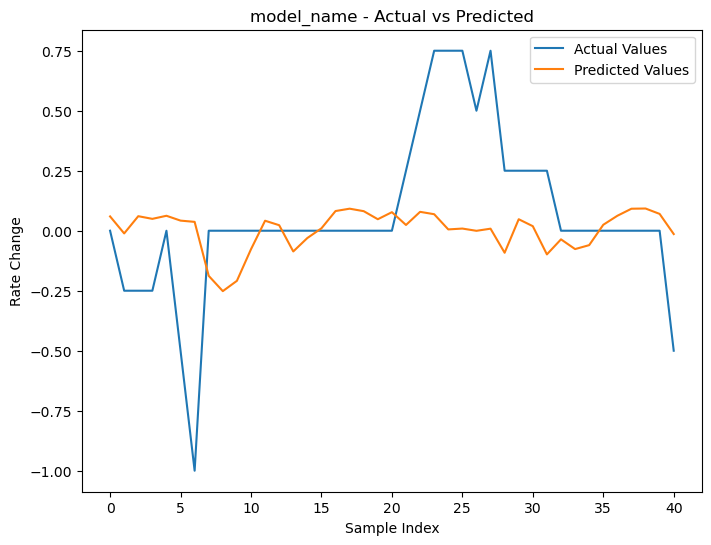

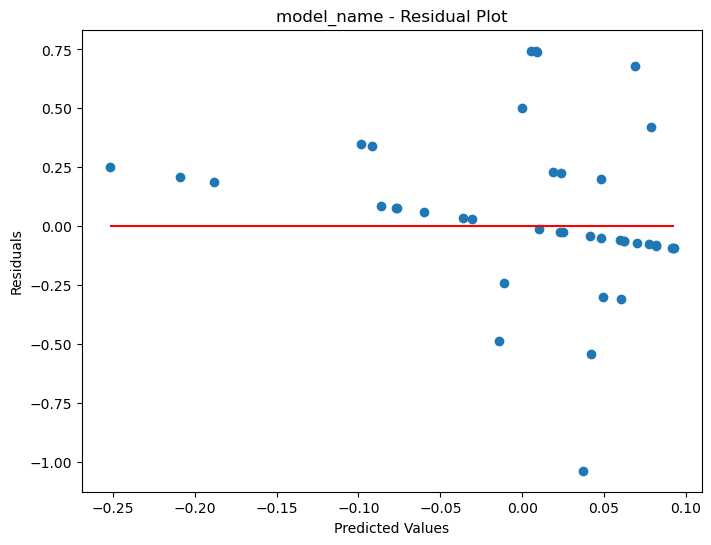

In [11]:
# 评估线性回归模型
evaluate_regression_model(lr_model, X_test, y_test, '线性回归')


=== 决策树回归 Regression Model Evaluation ===
Mean Squared Error (MSE): 0.15548780487804878
Root Mean Squared Error (RMSE): 0.39431941985914004
R² Score: -0.386604774535809


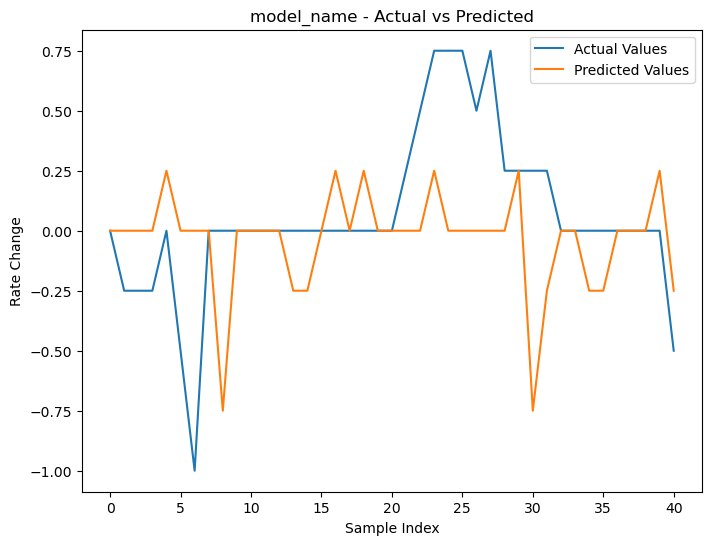

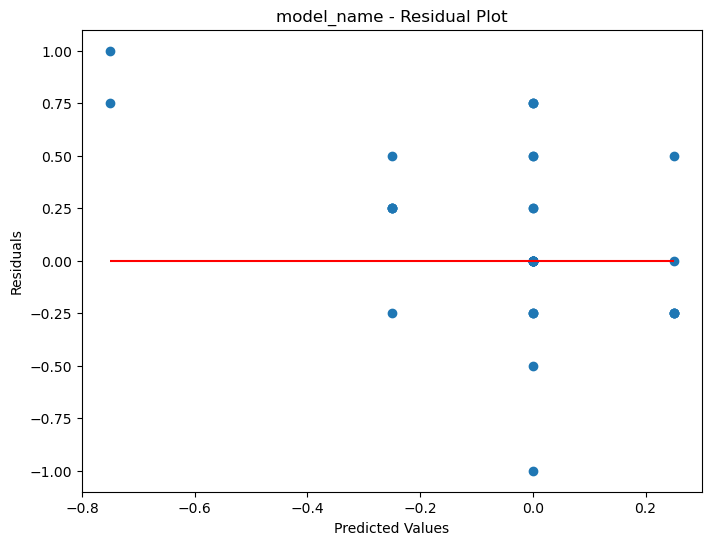

In [12]:
# 评估决策树回归模型
evaluate_regression_model(dt_model, X_test, y_test, '决策树回归')


=== 随机森林回归 Regression Model Evaluation ===
Mean Squared Error (MSE): 0.12385076219512198
Root Mean Squared Error (RMSE): 0.35192436999321597
R² Score: -0.10447284482758645


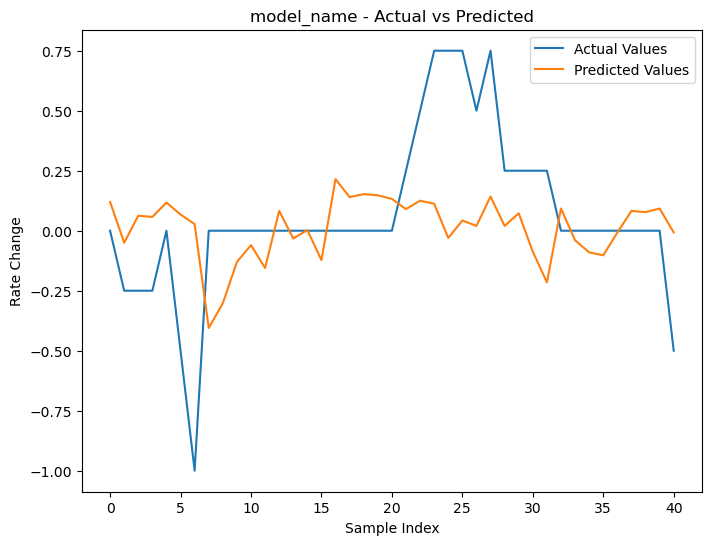

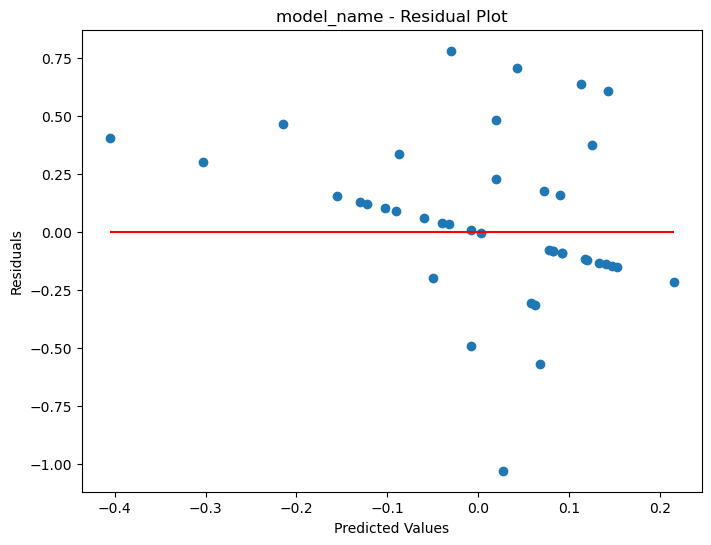

In [13]:
# 评估随机森林回归模型
evaluate_regression_model(rf_model, X_test, y_test, '随机森林回归')


=== 支持向量机回归 Regression Model Evaluation ===
Mean Squared Error (MSE): 0.13577313093963378
Root Mean Squared Error (RMSE): 0.3684740573495423
R² Score: -0.21079380959959892


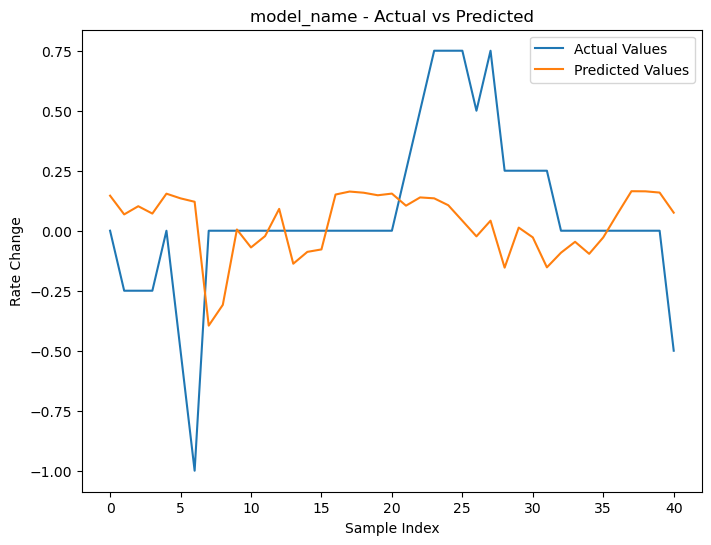

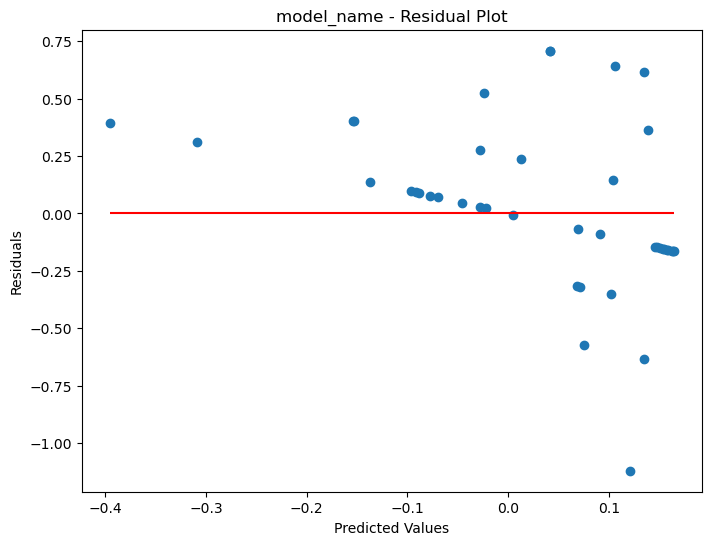

In [14]:
# 支持向量机回归
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)
evaluate_regression_model(svr_model, X_test, y_test, '支持向量机回归')


In [16]:
# XGBoost 回归
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# 将数据转换为 DMatrix 格式
dtrain_reg = xgb.DMatrix(X_train, label=y_train)
dtest_reg = xgb.DMatrix(X_test, label=y_test)

# 设置参数
params_reg = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'seed': 42
}

# 训练模型
bst_reg = xgb.train(params_reg, dtrain_reg, num_boost_round=100)

# 预测
y_pred_reg = bst_reg.predict(dtest_reg)

# 评估
mse = mean_squared_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)
print(f'MSE: {mse}, R²得分: {r2}')



MSE: 0.11565784304635884, R²得分: -0.03141026080068543


xgb参数调优

In [17]:
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0.5, 1, 1.5, 2]
}

tscv = TimeSeriesSplit(n_splits=5)

random_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("XGBoost 最佳参数：", random_search.best_params_)

best_xgb_reg = random_search.best_estimator_

y_pred = best_xgb_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== XGBoost 调优后回归模型评估 ===")
print(f"均方误差（MSE）：{mse}")
print(f"均方根误差（RMSE）：{rmse}")
print(f"R²得分：{r2}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/wooxoo/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/wooxoo/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/wooxoo/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/wooxoo/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/wooxoo/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas re

XGBoost 最佳参数： {'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 0.5, 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}
=== XGBoost 调优后回归模型评估 ===
均方误差（MSE）：0.11184819728470495
均方根误差（RMSE）：0.3344371350264575
R²得分：0.0025632910578832213
